In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from FVSimulation.Finite_volume_method_1D_gebeund import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})

In [11]:
data_listAl = []
sim_listAl = []
comp_listAl = []
tempsAl = np.linspace(0.14,0.25,10)
for temp in tempsAl:
    chippath = '../../DataKian/Al_LT165chip7/'
    Al_data = KID_data(chippath,
                    lambda_ph_in_nm=673,
                    KIDno=2,
                    readout_power=89,
                    temp_in_mK=120,
                    length=310,
                    T_eff=temp,
                    N0=172e8,
                    sigma_IC=5,
                    D=15000)
    Al_data.fit_tail(start=500,showplots=False)
    Al_sim = KID_sim(Al_data,dt=0.01,dx_or_fraction=1/2,simtime_approx=100,method='CrankNicolson')
    data_listAl.append(Al_data)
    sim_listAl.append(Al_sim)
    comp_listAl.append(sim_data_comp(Al_data,Al_sim))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:23<00:00, 120.16it/s]


In [14]:
data_listbTa = []
sim_listbTa = []
comp_listbTa = []
tempsbTa = np.linspace(0.08,0.15,10)
for temp in tempsbTa:
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=temp,
                        N0=303e8,
                        sigma_IC=5,
                        D=50)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/3,simtime_approx=100,method='CrankNicolson')
    data_listbTa.append(bTa_data)
    sim_listbTa.append(bTa_sim)
    comp_listbTa.append(sim_data_comp(bTa_data,bTa_sim))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:26<00:00, 384.08it/s]


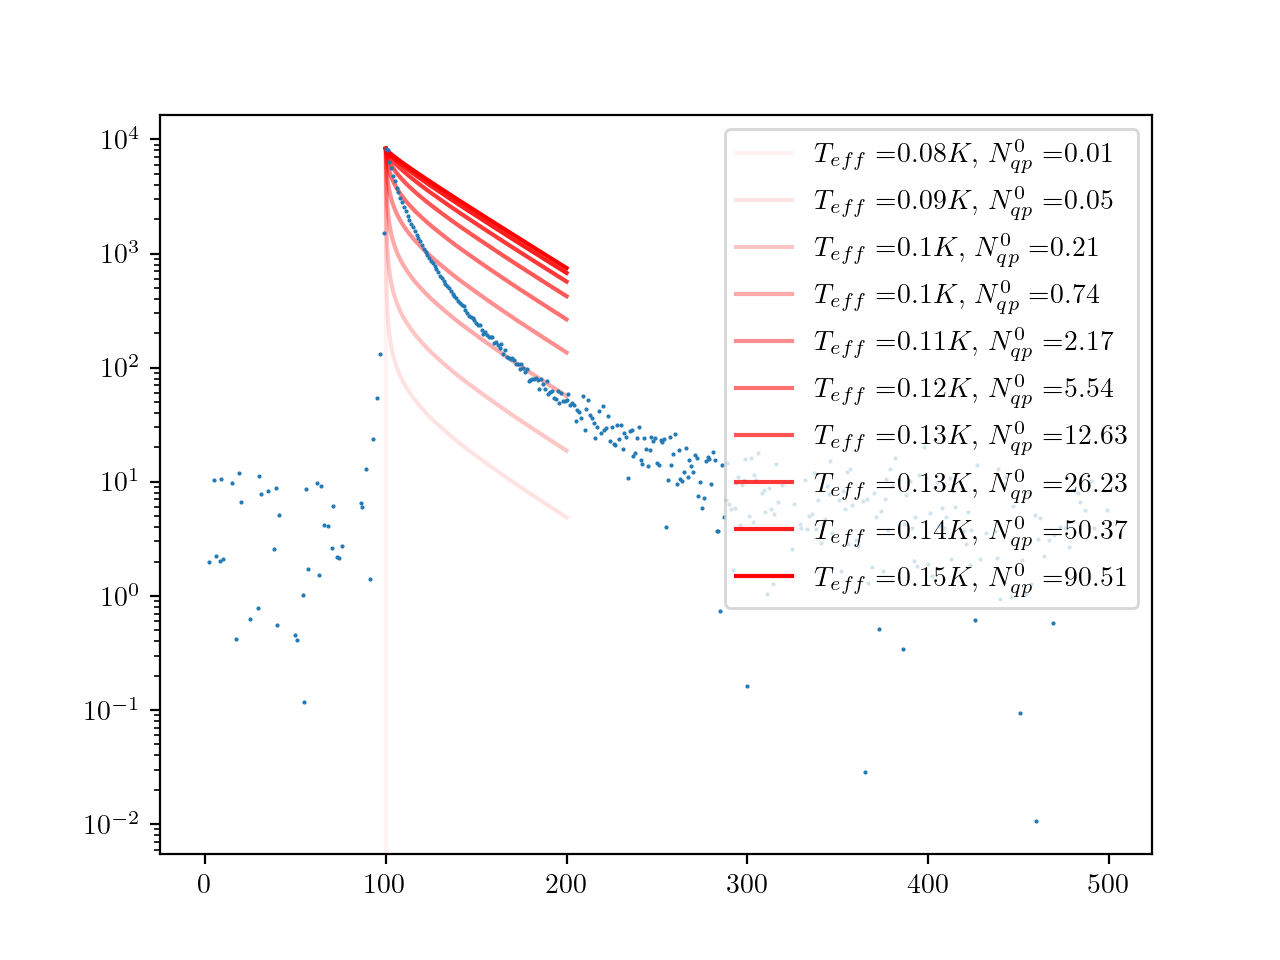

In [15]:
plt.figure()
temps = tempsbTa
data_list = data_listbTa
comp_list = comp_listbTa
for temp,data,comp in zip(temps,data_list,comp_list):
    label = r'$T_{eff}=$'+str(round(temp,2))+r'$K$, $N_{qp}^0=$'+str(round(data.nqp_thermal,2))
    alpha = np.max([0.05,(temp-np.min(temps))/(np.max(temps)-np.min(temps))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(comp.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()